# **Import and Install**

In [ ]:
# Data manipulation
import pandas as pd
pd.options.mode.chained_assignment = 'raise'
import numpy as np

# Pre-Processing
import re
import nltk
nltk.download('punkt') # For tokenize
nltk.download('stopwords') # For a standard list of stopwords.
nltk.download('wordnet') # For lemmatisation.
nltk.download('averaged_perceptron_tagger')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords, wordnet
from nltk.tokenize import word_tokenize
import string
import itertools
import time
from tqdm.auto import tqdm
import pickle

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style='darkgrid')
from wordcloud import WordCloud

# NLTK & Gensim
import gensim
from gensim.models import Word2Vec

# Modeling & Evaluation
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import f1_score, make_scorer, confusion_matrix, accuracy_score, precision_score, recall_score, precision_recall_curve
import keras
from keras.utils import to_categorical

import tensorflow as tf
print('Tensorflow version: {}'.format(tf.__version__))

# Ignore Warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

from IPython import display
display.clear_output()

In [ ]:
# Connect google drive with google colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Load the Dataset**

In [ ]:
# Import dataset
news_df = pd.read_csv('/content/drive/MyDrive/datasetailo/news.csv', usecols=['title', 'text', 'label'])
news_df

title  \
0                          You Can Smell Hillary’s Fear   
1     Watch The Exact Moment Paul Ryan Committed Pol...   
2           Kerry to go to Paris in gesture of sympathy   
3     Bernie supporters on Twitter erupt in anger ag...   
4      The Battle of New York: Why This Primary Matters   
...                                                 ...   
6330  State Department says it can't find emails fro...   
6331  The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...   
6332  Anti-Trump Protesters Are Tools of the Oligarc...   
6333  In Ethiopia, Obama seeks progress on peace, se...   
6334  Jeb Bush Is Suddenly Attacking Trump. Here's W...   

                                                   text label  
0     Daniel Greenfield, a Shillman Journalism Fello...  FAKE  
1     Google Pinterest Digg Linkedin Reddit Stumbleu...  FAKE  
2     U.S. Secretary of State John F. Kerry said Mon...  REAL  
3     — Kaydee King (@KaydeeKing) November 9, 2016 T...  FAKE  
4     It's primary day in New York and front-runners...  REAL  
...                                                 ...   ...  
6330  The State Department told the Republican Natio...  REAL  
6331  The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...  FAKE  
6332   Anti-Trump Protesters Are Tools of the Oligar...  FAKE  
6333  ADDIS ABABA, Ethiopia —President Obama convene...  REAL  
6334  Jeb Bush Is Suddenly Attacking Trump. Here's W...  REAL  

[6335 rows x 3 columns]

# **Exploratory Data Analysis (EDA)**

In [ ]:
# Import dataset final update
news_df = pd.read_csv('/content/drive/MyDrive/datasetailo/News-Clean.csv')
news_df

title  \
0                          You Can Smell Hillary’s Fear   
1     Watch The Exact Moment Paul Ryan Committed Pol...   
2           Kerry to go to Paris in gesture of sympathy   
3     Bernie supporters on Twitter erupt in anger ag...   
4      The Battle of New York: Why This Primary Matters   
...                                                 ...   
6330  State Department says it can't find emails fro...   
6331  The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...   
6332  Anti-Trump Protesters Are Tools of the Oligarc...   
6333  In Ethiopia, Obama seeks progress on peace, se...   
6334  Jeb Bush Is Suddenly Attacking Trump. Here's W...   

                                                   text label  
0     You Can Smell Hillary Fear Daniel Greenfield S...  FAKE  
1     Watch The Exact Moment Paul Ryan Committed Pol...  FAKE  
2     Kerry go Paris gesture sympathy Secretary Stat...  REAL  
3     Bernie supporters Twitter erupt anger DNC We t...  FAKE  
4     The Battle New York Why This Primary Matters I...  REAL  
...                                                 ...   ...  
6330  State Department says find emails Clinton IT s...  REAL  
6331  The PBS Should Stand Plutocratic Pentagon The ...  FAKE  
6332  AntiTrump Protesters Are Tools Oligarchy Infor...  FAKE  
6333  In Ethiopia Obama seeks progress peace securit...  REAL  
6334  Jeb Bush Is Suddenly Attacking Trump Here Why ...  REAL  

[6335 rows x 3 columns]

In [ ]:
# Periksa informasi dataframe
news_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   6335 non-null   object
 1   text    6335 non-null   object
 2   label   6335 non-null   object
dtypes: object(3)
memory usage: 148.6+ KB


In [ ]:
"""
basic_string_manipulasi(teks): Fungsi ini mengambil teks string sebagai masukan dan
menggunakan ekspresi reguler untuk mengganti setiap kemunculan karakter tanda baca
(,, ;, :, !, -, (, ), [, ], .) dengan karakter yang sama yang dikelilingi spasi.
Fungsi ini digunakan untuk melakukan prapemrosesan teks sebelum menjalankan fungsi lainnya.

Contoh masukan: "Halo! Nama saya John."
Contoh keluaran: "Halo! Nama saya John. "
"""
def basic_string_manipulation(text):
    text = re.sub(r'[,;:?!-\(\)\[\].]+',' \g<0> ', text)
    return text


"""
count_num_token(teks): Fungsi ini mengambil teks string sebagai masukan dan membaginya
menjadi token (kata) menggunakan spasi sebagai pembatas. Fungsi ini kemudian mengembalikan jumlah token.

Contoh masukan: "Halo! Nama saya John."
Contoh keluaran: 5
"""
def count_num_tokens(text):
    tokens = text.split()
    return len(tokens)


"""
generate_dict_from_text(text): Fungsi ini mengambil sebuah teks string sebagai masukan dan
membaginya menjadi token (kata) menggunakan spasi sebagai pembatas.
Fungsi ini kemudian menghasilkan kamus yang memetakan setiap token unik ke frekuensinya di dalam teks.
Fungsi mengembalikan kamus ini.

Contoh masukan: "Halo! Nama saya John. Nama belakang saya adalah Smith."
Contoh keluaran: {"Halo!": 1, "Saya": 2, "nama": 1, "adalah": 2, "John.": 1, "terakhir": 1, "Smith.": 1}

"""
def generate_dict_from_text(text):
    tokens = text.split()
    word_freq_dic= {}
    for token in tokens:
        word_freq_dic[token]= word_freq_dic.get(token, 1)+1
    return word_freq_dic


"""
num_distinct_token(teks): Fungsi ini mengambil teks string sebagai masukan dan membaginya
menjadi token (kata) menggunakan spasi sebagai pembatas. Fungsi ini kemudian menghitung jumlah
token unik dan mengembalikan jumlah ini.

Contoh masukan: "Halo! Nama saya John. Nama belakang saya adalah Smith."
Contoh keluaran: 7
"""
def num_distinct_tokens(text):
    tokens = text.split()
    dist_tokens = set()
    for token in tokens:
        dist_tokens.add(token)
    return len(dist_tokens)


"""
common_token(teks, common_list): Fungsi ini mengambil teks string dan daftar
kata-kata umum common_list sebagai masukan. Fungsi ini membagi teks menjadi token (kata-kata)
menggunakan spasi sebagai pembatas dan menghitung jumlah token yang muncul di
daftar kata umum. Kemudian mengembalikan jumlah ini.

Contoh masukan: ("Halo! Nama saya John. Nama belakang saya Smith.", ["My", "is"])
Contoh keluaran: 4
"""
def common_tokens(text, common_list):
    tokens = text.split()
    common_token_num = 0
    for token in tokens:
        if token in common_list:
            common_token_num+=1
    return common_token_num

"""
get_most_used_token(token_dict): Fungsi ini mengambil sebuah kamus token_dict
yang memetakan setiap token unik ke frekuensinya dalam sebuah teks dan mengembalikan daftar
token yang paling sering muncul, berdasarkan aturan 20-80
(yaitu, 20% dari kata-kata biasanya sesuai dengan 80% dari jumlah total kata).
Fungsi ini secara berulang-ulang menelusuri token-token dalam token_dict dalam urutan
urutan frekuensi dan menambahkan setiap token ke daftar keluaran sampai total
frekuensi token keluaran setidaknya 80% dari jumlah total kata.
Kemudian mengembalikan daftar token yang paling sering digunakan.

Contoh masukan: {"Halo!": 1, "Saya": 2, "nama": 2, "adalah": 2, "John.": 1, "terakhir": 1, "Smith.": 1}
Contoh keluaran: ["Saya", "nama", "adalah", "Halo!", "John.", "terakhir", "Smith."]
"""
def get_most_used_tokens(token_dict):
    total_num_words = sum(token_dict.values())
    most_used = []
    total_most_used = 0
    word_iterator = iter(sorted(token_dict.items(), key=lambda x: x[1], reverse=True))
    while total_most_used < total_num_words*0.8:
        word_tuple = next(word_iterator)
        most_used.append(word_tuple[0])
        total_most_used+=word_tuple[1]
    return most_used

In [ ]:
# Read raw data
unorm_df = pd.read_csv('/content/drive/MyDrive/datasetailo/news.csv', usecols=['title', 'text', 'label'])
# Read norm data
norm_df = news_df

# Apply function basic_string_manipulation
unorm_df['text'] = unorm_df['text'].apply(lambda x: basic_string_manipulation(x))
# Apply function generate_dict_from text for unorm_df
distinct_words_unorm = generate_dict_from_text(" ".join(unorm_df['text'].tolist()))
# Apply function generate_dict_from text for norm_df
distinct_words_norm = generate_dict_from_text(" ".join(norm_df['text'].tolist()))
# Apply function get_most_used_tokens text for unorm_df
most_used_words_unorm = get_most_used_tokens(distinct_words_unorm)
# Apply function get_most_used_tokens text for norm_df
most_used_words_norm = get_most_used_tokens(distinct_words_norm)
print("""Distinct words in unnormalized: {} -
         80% of the text correspond to {} distinct words.
         \nDistinct words in normalized: {} - 80% of the text correspond to
         {} distinct words.\n""".format(len(distinct_words_unorm),len(most_used_words_unorm),len(distinct_words_norm),len(most_used_words_norm)))

Distinct words in unnormalized: 122312 -
         80% of the text correspond to 2652 distinct words.
         
Distinct words in normalized: 96778 - 80% of the text correspond to
         6738 distinct words.



In [ ]:
unorm_df['Size_in_Chars']=unorm_df['text'].apply(lambda x: len(x))
norm_df['Size_in_Chars']=norm_df['text'].apply(lambda x: len(x))
unorm_df['Size_in_Tokens']=unorm_df['text'].apply(lambda x: count_num_tokens(x))
norm_df['Size_in_Tokens']=norm_df['text'].apply(lambda x: count_num_tokens(x))
unorm_df['Num_distinct_Tokens']=unorm_df['text'].apply(lambda x: num_distinct_tokens(x))
norm_df['Num_distinct_Tokens']=norm_df['text'].apply(lambda x: num_distinct_tokens(x))
unorm_df['Common_tokens']=unorm_df['text'].apply(lambda x: common_tokens(x, most_used_words_unorm))
norm_df['Common_tokens']=norm_df['text'].apply(lambda x: common_tokens(x, most_used_words_norm))

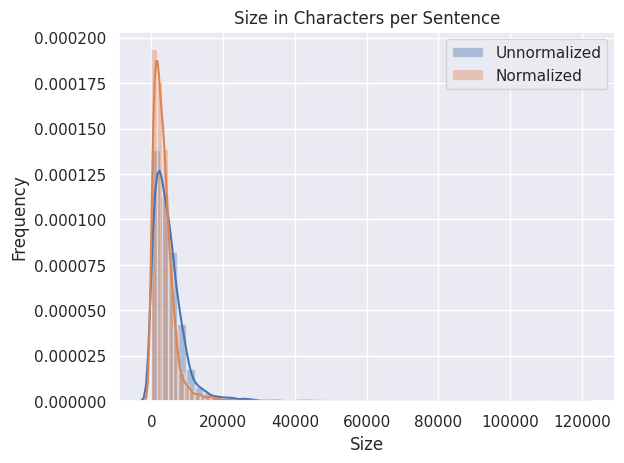

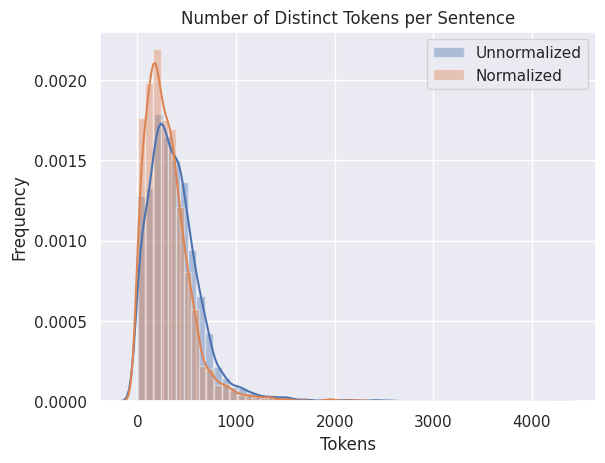

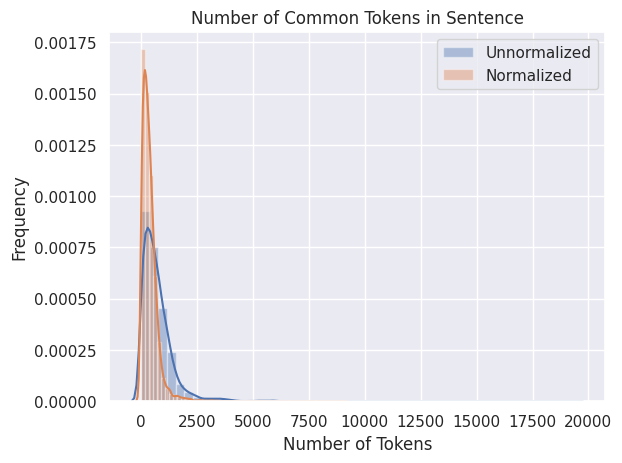

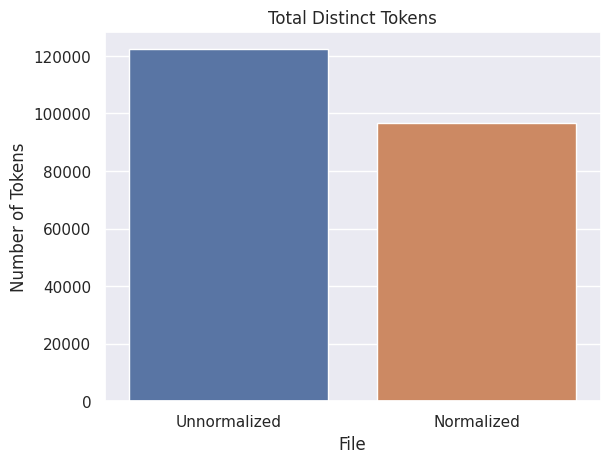

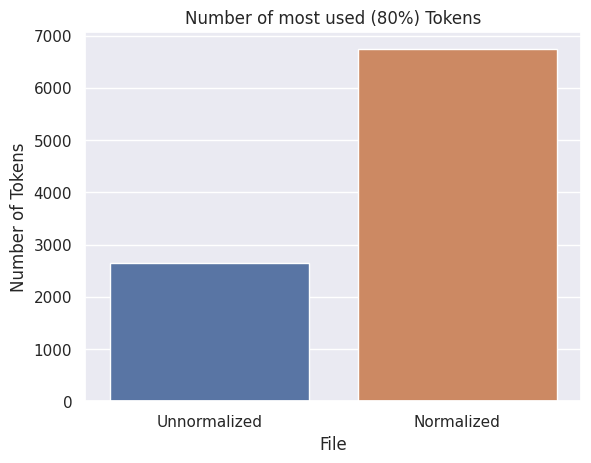

In [ ]:
# Size in Characters
sns.distplot(unorm_df['Size_in_Chars'], label='Unnormalized')
sns.distplot(norm_df['Size_in_Chars'], label='Normalized')
plt.legend(loc='upper right')
plt.title('Size in Characters per Sentence')
plt.xlabel('Size')
plt.ylabel('Frequency')
plt.savefig('size_chars.png')
plt.show()

# Distinct Tokens
sns.distplot(unorm_df['Num_distinct_Tokens'], label='Unnormalized')
sns.distplot(norm_df['Num_distinct_Tokens'], label='Normalized')
plt.legend(loc='upper right')
plt.title('Number of Distinct Tokens per Sentence')
plt.xlabel('Tokens')
plt.ylabel('Frequency')
plt.savefig('num_tokens.png')
plt.show()

# Number of common Tokens in Sentence
sns.distplot(unorm_df['Common_tokens'], label='Unnormalized')
sns.distplot(norm_df['Common_tokens'], label='Normalized')
plt.legend(loc='upper right')
plt.title('Number of Common Tokens in Sentence')
plt.xlabel('Number of Tokens')
plt.ylabel('Frequency')
plt.savefig('common_tokens.png')
plt.show()

# Total Number of Distinct Tokens
sns.barplot(x=["Unnormalized","Normalized"],y=[len(distinct_words_unorm), len(distinct_words_norm)], palette="deep")
plt.title('Total Distinct Tokens')
plt.xlabel('File')
plt.ylabel('Number of Tokens')
plt.savefig('total_distinct_tokens.png')
plt.show()

# Total Number of Most Used Tokens (80%)
sns.barplot(x=["Unnormalized","Normalized"],y=[len(most_used_words_unorm), len(most_used_words_norm)], palette="deep")
plt.title('Number of most used (80%) Tokens')
plt.xlabel('File')
plt.ylabel('Number of Tokens')
plt.savefig('most_used_tokens.png')
plt.show()

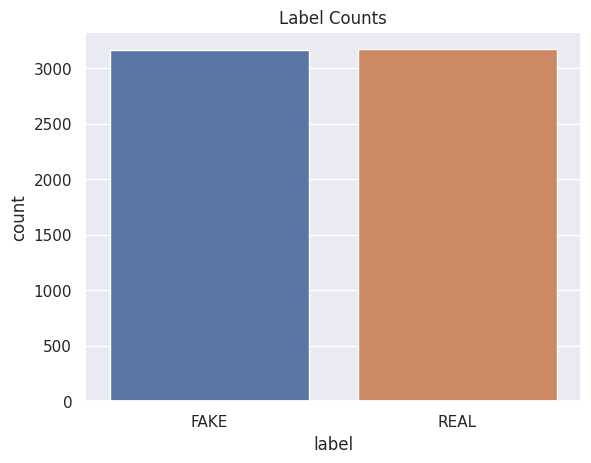

In [ ]:
# Visualization label counts of dataset
fig = sns.countplot(x= 'label',data = news_df)
plt.title('Label Counts')
plot = fig.get_figure()

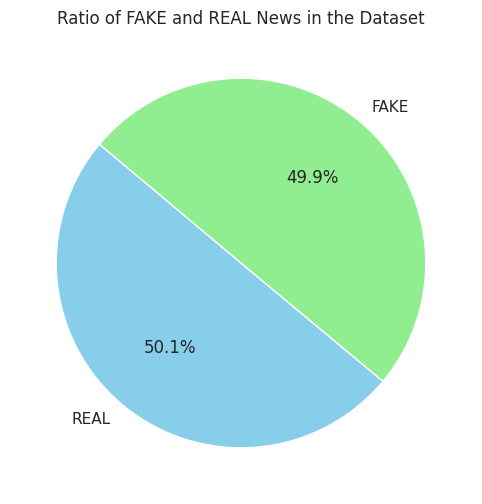

In [ ]:
# Count the occurrences of FAKE and REAL labels
label_counts = news_df['label'].value_counts()

# Pie chart for visualizing the ratio of FAKE and REAL news
plt.figure(figsize=(8, 6))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightgreen'])
plt.title('Ratio of FAKE and REAL News in the Dataset')
plt.show()

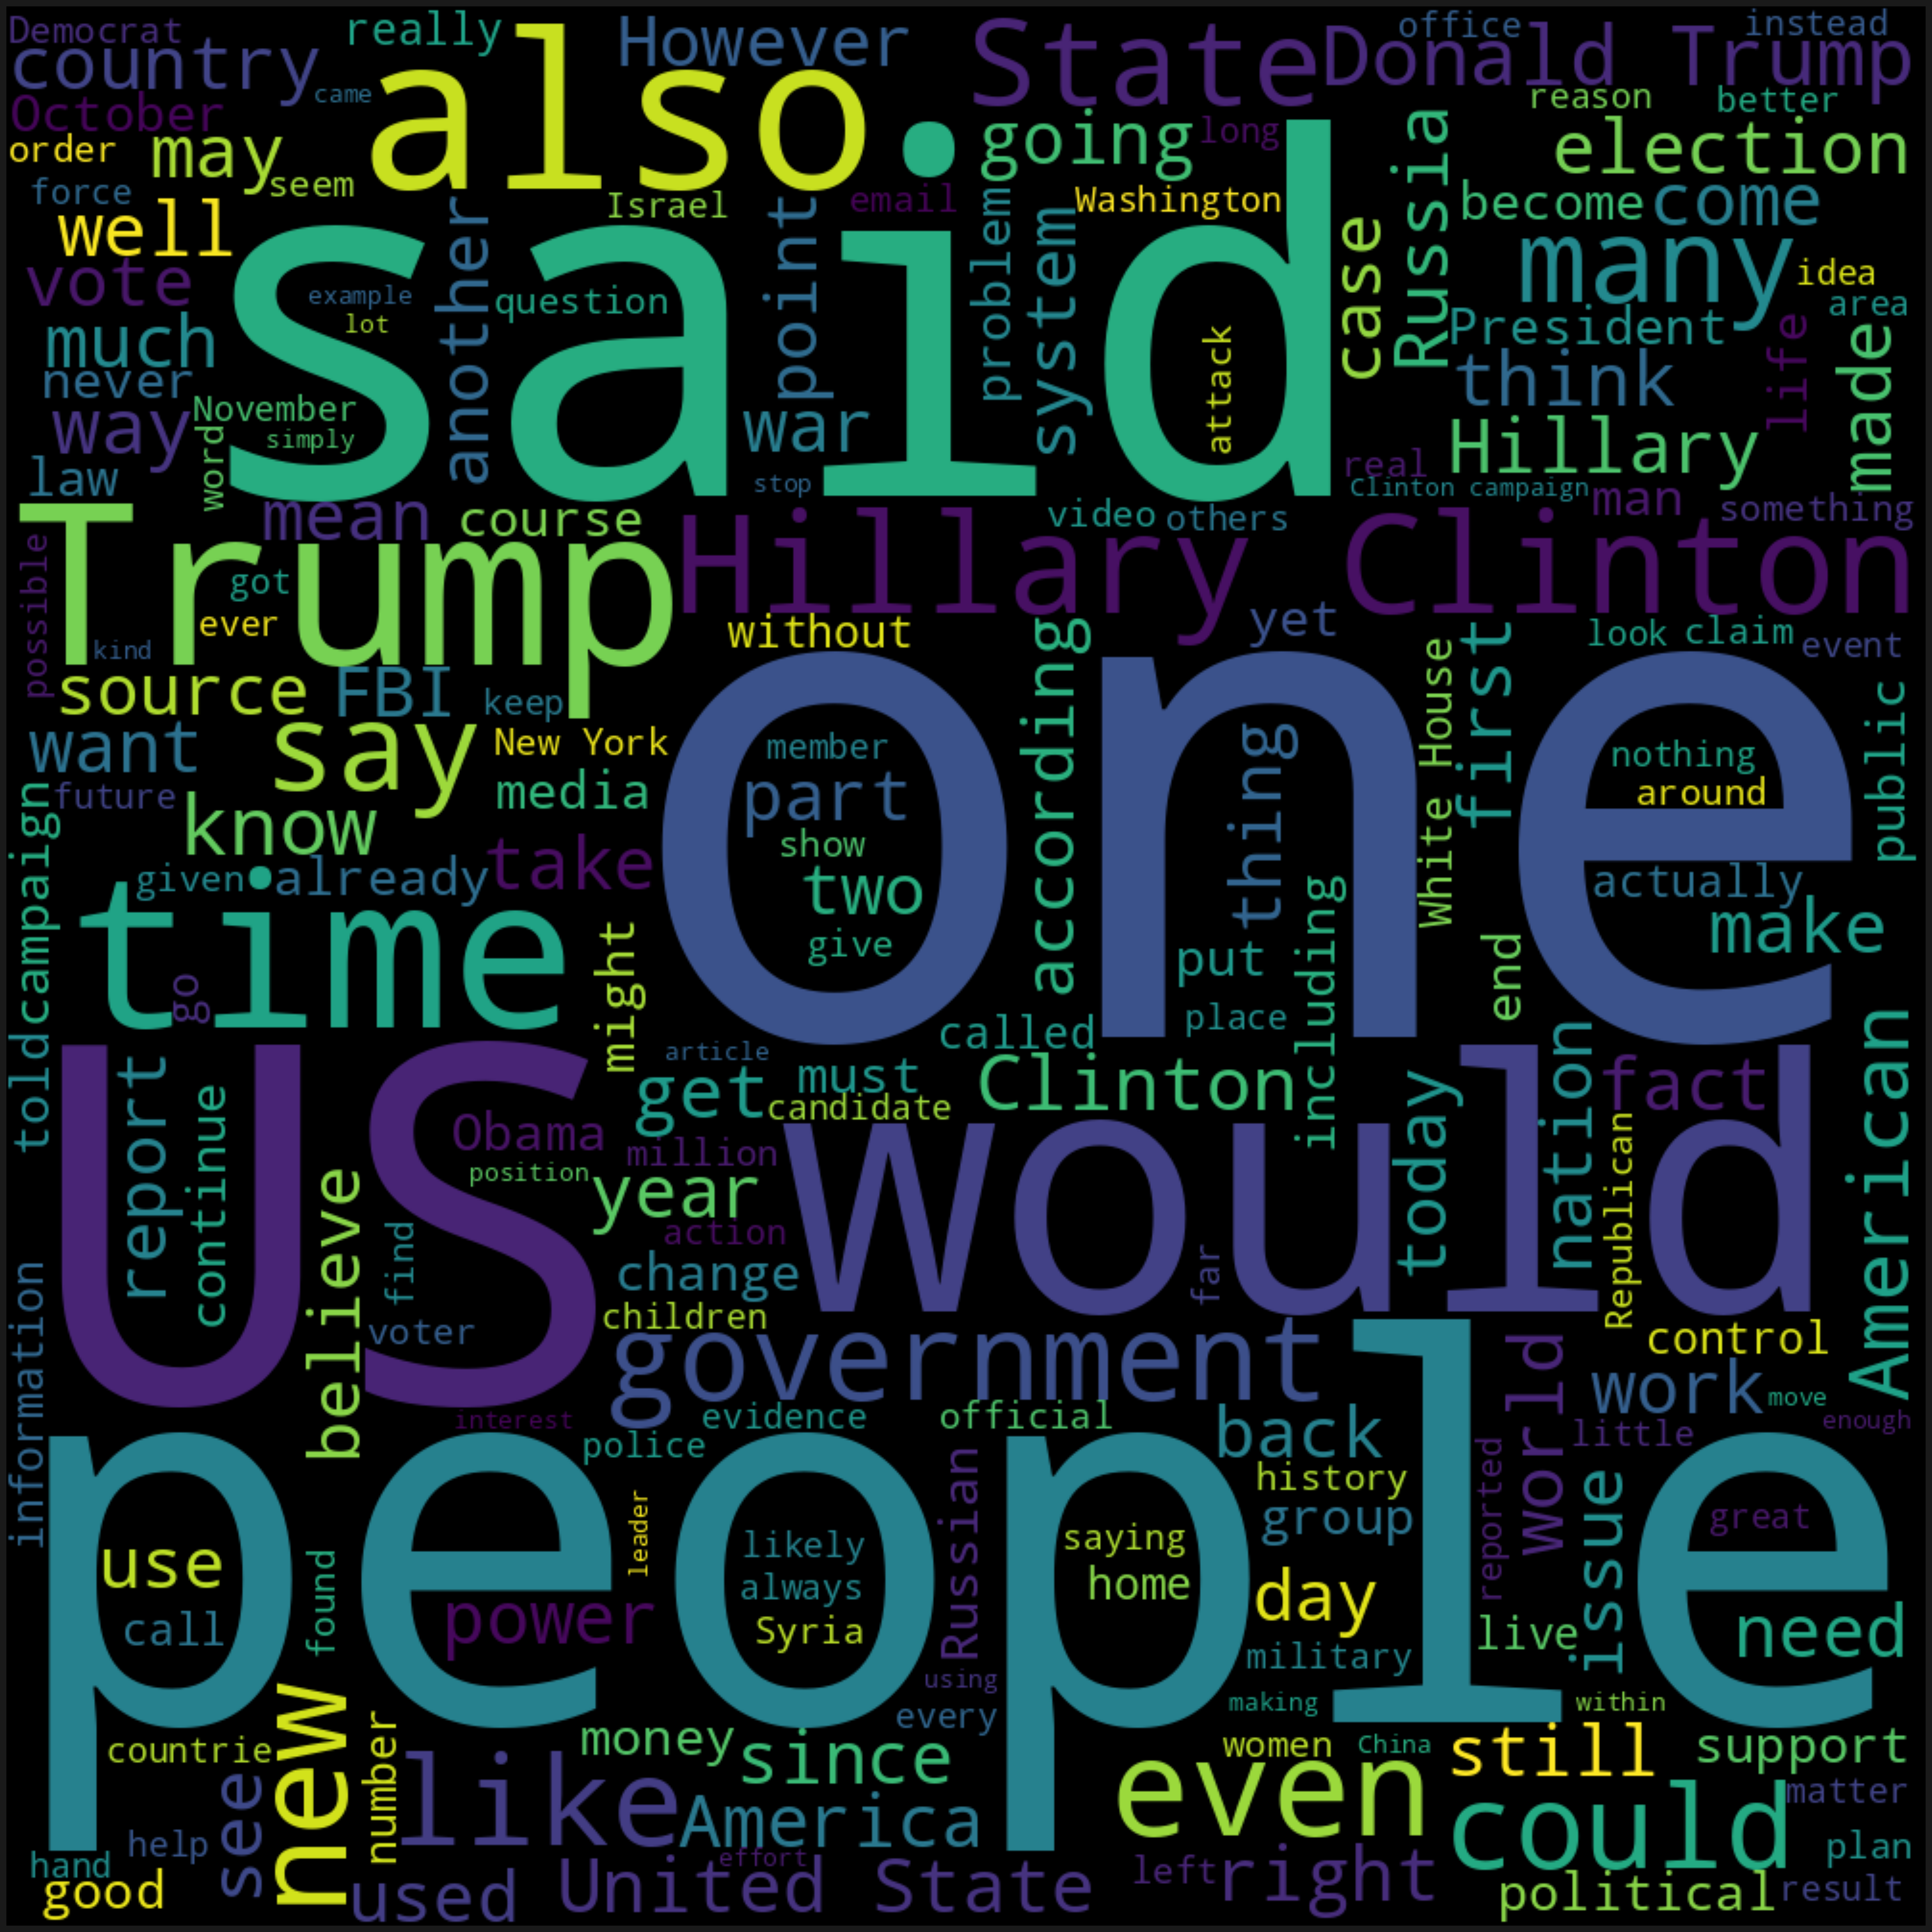

In [ ]:
# Word Cloud Fake News
fake_news = news_df[news_df['label'] == 'FAKE']

text = ''
for news in fake_news.text.values:
    text += f" {news}"
wordcloud = WordCloud(
    width = 1000,
    height = 1000,
    background_color = 'black',
    stopwords = set(nltk.corpus.stopwords.words("english"))).generate(text)
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()
del text

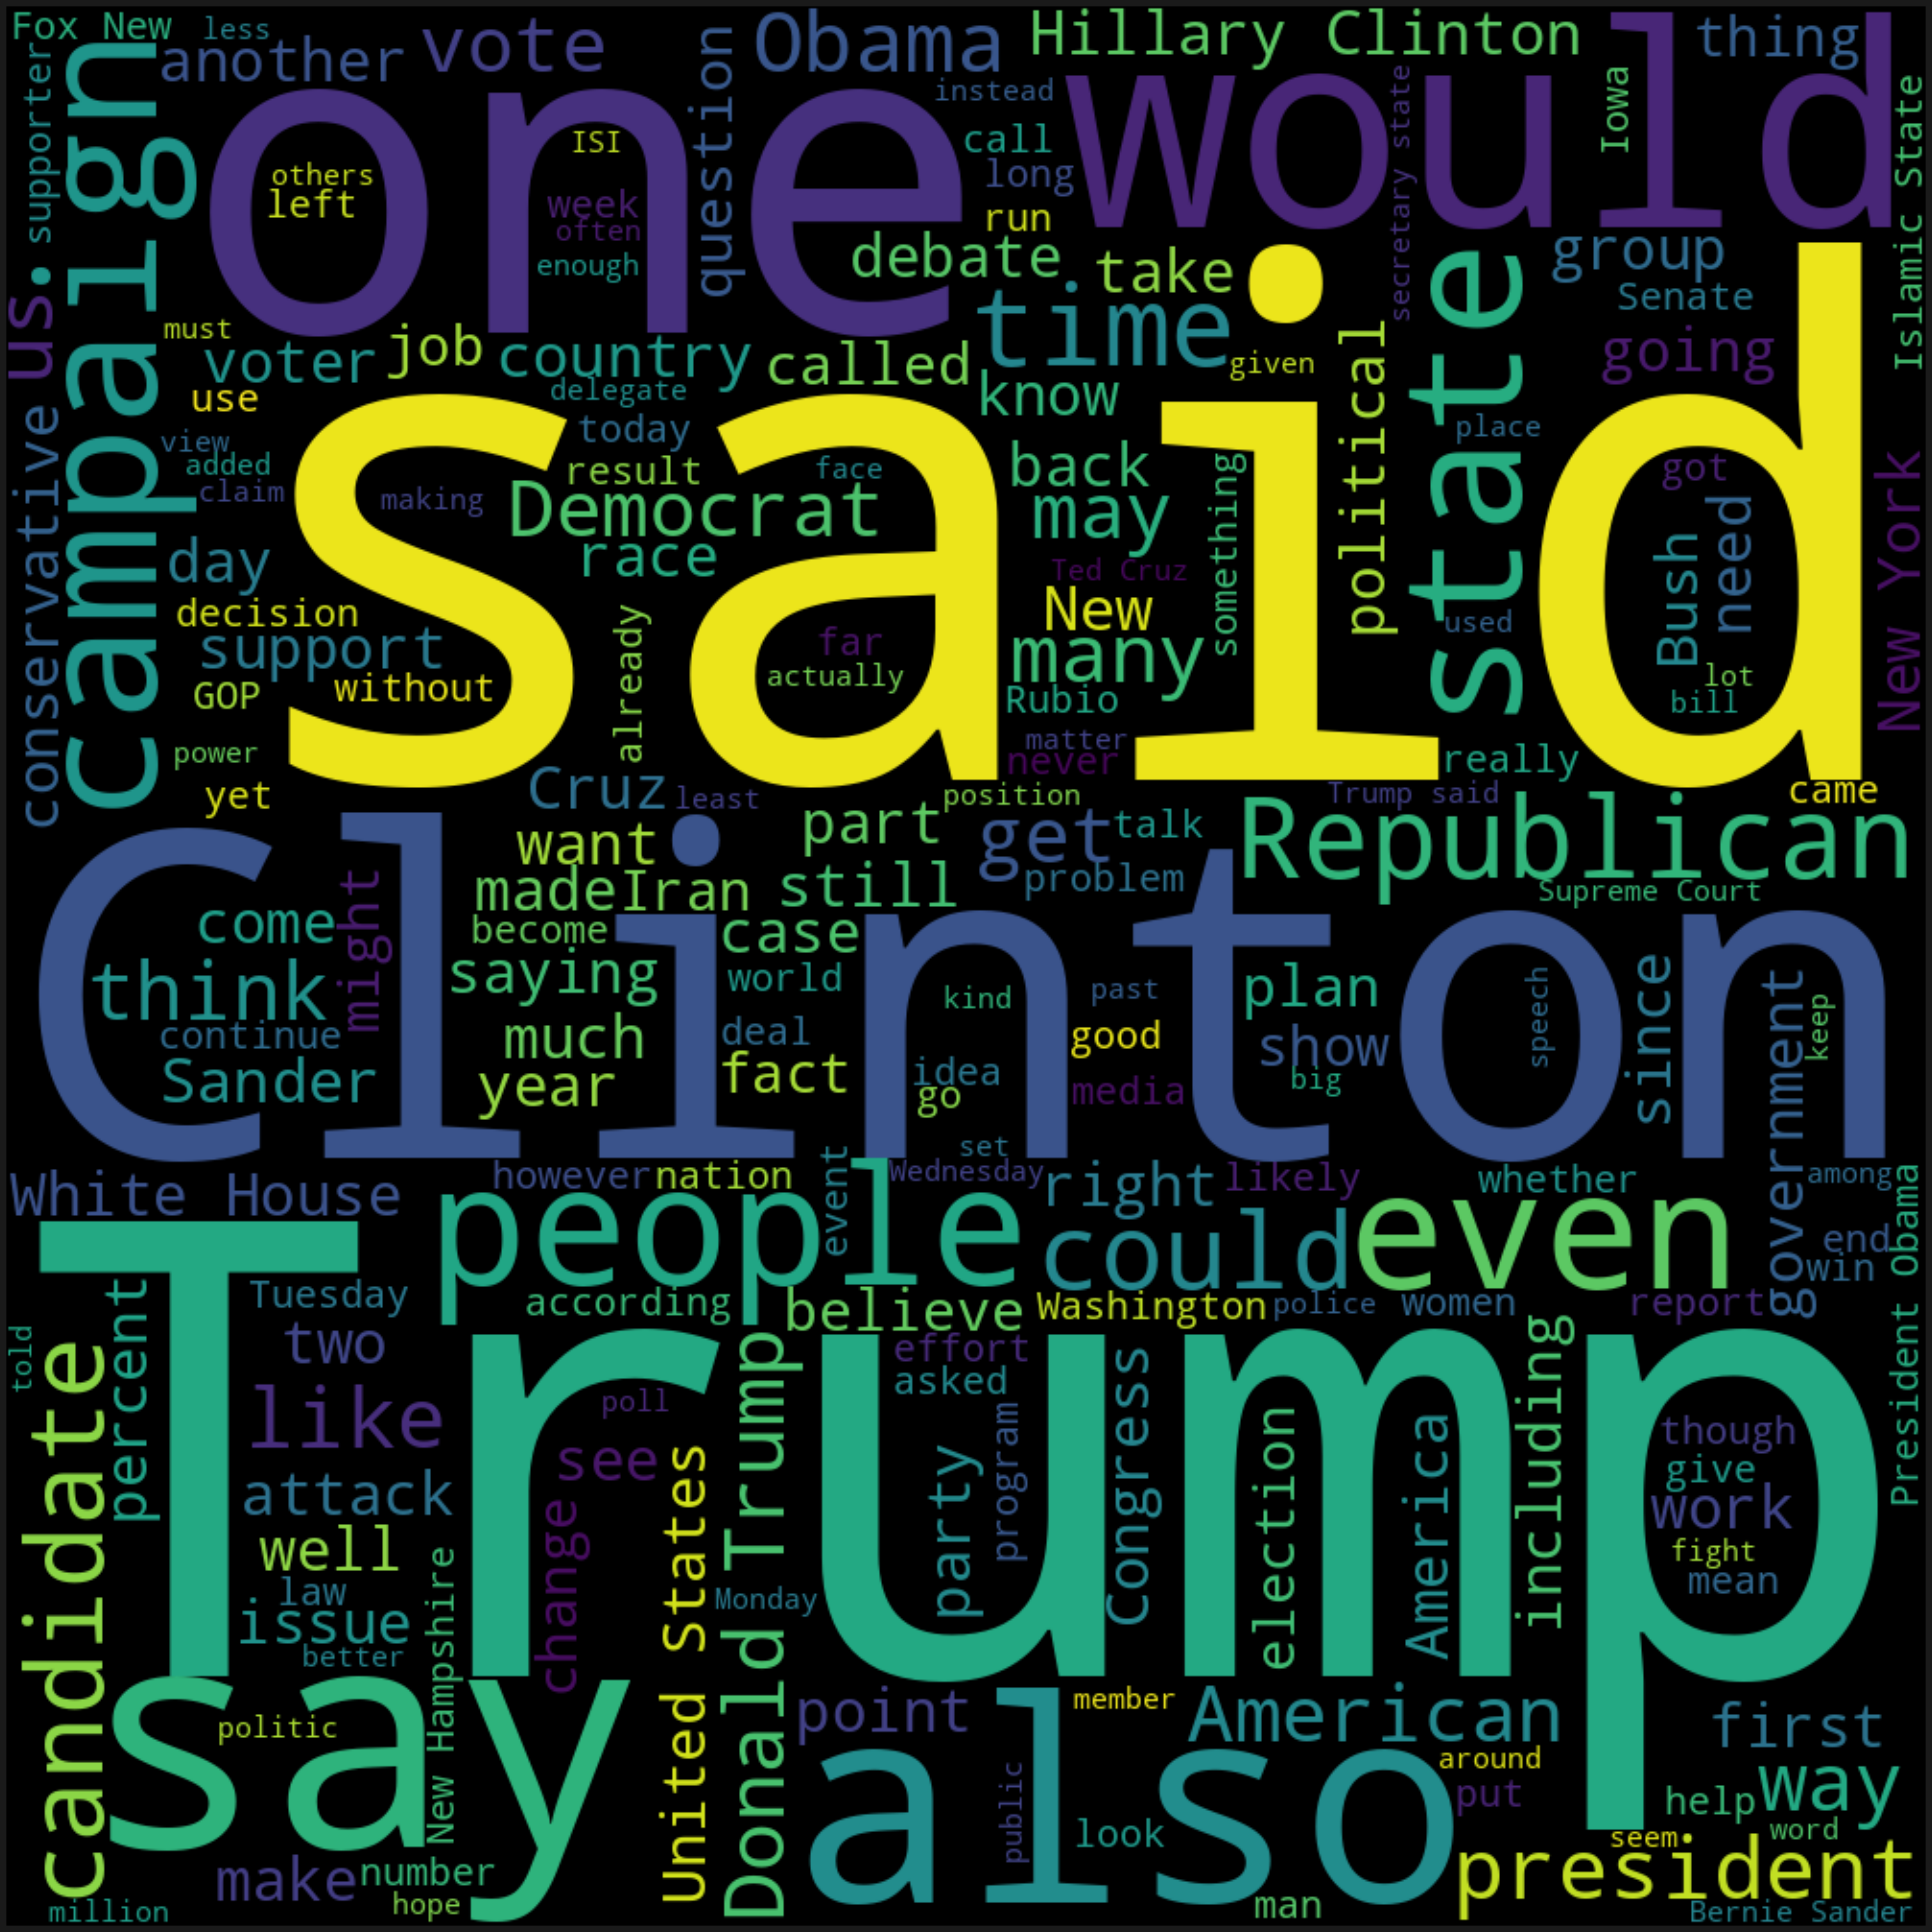

In [ ]:
# Word Cloud Real News
real_news = news_df[news_df['label'] == 'REAL']

text = ''
for news in real_news.text.values:
    text += f" {news}"
wordcloud = WordCloud(
    width = 1000,
    height = 1000,
    background_color = 'black',
    stopwords = set(nltk.corpus.stopwords.words("english"))).generate(text)
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()
del text

In [ ]:
# Convert data type of label
def to_categorical(Label):
    if Label == 'REAL':
      return 0
    else:
      return 1
news_df['label'] = news_df['label'].apply(to_categorical)

In [ ]:
# Convert dataframe column text into list
sentences = [word_tokenize(txt.lower()) for txt in news_df['text']]
sentences[:5]

[['you',
  'can',
  'smell',
  'hillary',
  'fear',
  'daniel',
  'greenfield',
  'shillman',
  'journalism',
  'fellow',
  'freedom',
  'center',
  'new',
  'york',
  'writer',
  'focusing',
  'radical',
  'islam',
  'in',
  'final',
  'stretch',
  'election',
  'hillary',
  'rodham',
  'clinton',
  'gone',
  'war',
  'fbi',
  'the',
  'word',
  'unprecedented',
  'thrown',
  'around',
  'often',
  'election',
  'ought',
  'retired',
  'but',
  'still',
  'unprecedented',
  'nominee',
  'major',
  'political',
  'party',
  'go',
  'war',
  'fbi',
  'but',
  'exactly',
  'hillary',
  'people',
  'done',
  'coma',
  'patients',
  'waking',
  'watching',
  'hour',
  'cnn',
  'hospital',
  'beds',
  'would',
  'assume',
  'fbi',
  'director',
  'james',
  'comey',
  'hillary',
  'opponent',
  'election',
  'the',
  'fbi',
  'attack',
  'everyone',
  'obama',
  'cnn',
  'hillary',
  'people',
  'circulated',
  'letter',
  'attacking',
  'comey',
  'there',
  'currently',
  'media',
  'hit'

# **Pre-processing Dataset**

In [ ]:
# Menggabungkan Judul dan Teks berita
news_df["text"] = news_df["title"] + " " + news_df["text"]

In [ ]:
# Salin df_reviews ke df_preprocessing
df_preprocessing = news_df.copy()
df_preprocessing = df_preprocessing[['text']]

In [ ]:
# Proses menghilangkan karakter spesial
def menghapus_karakter_special(Text):
    # Menambahakan spasi setelah titik atau koma
    Text =  re.sub(r"(?<=[.,])(?=[^\s])", r" ", str(Text))
    # Hapus karakter non-ascii dari string
    Text = re.sub(r"[^\x00-\x7f]",r" ", str(Text))
    # Ganti 2+ titik dengan spasi
    Text = re.sub(r"\.{2,}", " ", str(Text))
    # Hapus baris baru
    Text = str(Text).replace("\\n", "")
    # Hapus hashtags
    Text = re.sub(r"#", "", str(Text))
    # Hapus @username
    Text = re.sub('@[^\s]+','',Text)
    # Hapus karakter huruf tunggal
    Text = re.sub(r"\b[a-zA-Z]\b", "", str(Text))
    # # Hapus angka
    # Text = re.sub("[0-9]+", "", str(Text))
    # Hapus url
    Text = re.sub(r"http\S+", "", str(Text))
    # Hapus spasi biasa
    Text = str(Text).strip(' "\'')
    # Hapus spasi/jarak yang berlebihan
    Text = re.sub(r"\s+", " ", str(Text))
    # Hapus tanda baca
    Text = str(Text).translate(str.maketrans("","",string.punctuation))
    # Hapus url yang tidak lengkap
    return str(Text).replace("http://", " ").replace("https://", " ")

news_df['text'] = news_df['text'].apply(menghapus_karakter_special)
df_preprocessing['cleansing'] = news_df['text']

print('Remove Special Character Result : \n')
print(news_df['text'].head(50))

Remove Special Character Result : 

0     You Can Smell Hillary Fear Daniel Greenfield S...
1     Watch The Exact Moment Paul Ryan Committed Pol...
2     Kerry to go to Paris in gesture of sympathy   ...
3     Bernie supporters on Twitter erupt in anger ag...
4     The Battle of New York Why This Primary Matter...
5     Tehran USA not an immigrant but my grandparent...
6     Girl Horrified At What She Watches Boyfriend D...
7     Britain Schindler Dies at 106 Czech stockbroke...
8     Fact check Trump and Clinton at the commanderi...
9     Iran reportedly makes new push for uranium con...
10    With all three Clintons in Iowa glimpse at the...
11    Donald Trump Shockingly Weak Delegate Game Som...
12    Strong Solar Storm Tech Risks Today  S0 News O...
13    10 Ways America Is Preparing for World War 3 O...
14    Trump takes on Cruz but lightly Killing Obama ...
15    How women lead differently As more women move ...
16    Shocking Michele Obama  Hillary Caught Glamori...
17    Hillar

In [ ]:
# Prosel menghilangkan emoticon/emoji
def remove_emoji(Text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002500-\U00002BEF"  # chinese char
                           u"\U00002702-\U000027B0"
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           u"\U0001f926-\U0001f937"
                           u"\U00010000-\U0010ffff"
                           u"\u2640-\u2642"
                           u"\u2600-\u2B55"
                           u"\u200d"
                           u"\u23cf"
                           u"\u23e9"
                           u"\u231a"
                           u"\ufe0f"  # dingbats
                           u"\u3030"
                           "]+", flags=re.UNICODE)
    Text = emoji_pattern.sub(r'', Text)
    return emoji_pattern.sub(r'', Text)

news_df['text'] = news_df['text'].apply(remove_emoji)
df_preprocessing['remove_emoticon'] = news_df['text']

print('Remove Emoticon Result : \n')
print(news_df['text'].head(50))

Remove Emoticon Result : 

0     You Can Smell Hillary Fear Daniel Greenfield S...
1     Watch The Exact Moment Paul Ryan Committed Pol...
2     Kerry to go to Paris in gesture of sympathy   ...
3     Bernie supporters on Twitter erupt in anger ag...
4     The Battle of New York Why This Primary Matter...
5     Tehran USA not an immigrant but my grandparent...
6     Girl Horrified At What She Watches Boyfriend D...
7     Britain Schindler Dies at 106 Czech stockbroke...
8     Fact check Trump and Clinton at the commanderi...
9     Iran reportedly makes new push for uranium con...
10    With all three Clintons in Iowa glimpse at the...
11    Donald Trump Shockingly Weak Delegate Game Som...
12    Strong Solar Storm Tech Risks Today  S0 News O...
13    10 Ways America Is Preparing for World War 3 O...
14    Trump takes on Cruz but lightly Killing Obama ...
15    How women lead differently As more women move ...
16    Shocking Michele Obama  Hillary Caught Glamori...
17    Hillary Clinton

In [ ]:
# Prosel melakukan tokenizing
def word_tokenize_wrapper(Text):
    return word_tokenize(Text)

news_df['text'] = news_df['text'].apply(word_tokenize_wrapper)
df_preprocessing['tokenizing'] = news_df['text']

print('Tokenizing Result : \n')
print(news_df['text'].head(50))

Tokenizing Result : 

0     [You, Can, Smell, Hillary, Fear, Daniel, Green...
1     [Watch, The, Exact, Moment, Paul, Ryan, Commit...
2     [Kerry, to, go, to, Paris, in, gesture, of, sy...
3     [Bernie, supporters, on, Twitter, erupt, in, a...
4     [The, Battle, of, New, York, Why, This, Primar...
5     [Tehran, USA, not, an, immigrant, but, my, gra...
6     [Girl, Horrified, At, What, She, Watches, Boyf...
7     [Britain, Schindler, Dies, at, 106, Czech, sto...
8     [Fact, check, Trump, and, Clinton, at, the, co...
9     [Iran, reportedly, makes, new, push, for, uran...
10    [With, all, three, Clintons, in, Iowa, glimpse...
11    [Donald, Trump, Shockingly, Weak, Delegate, Ga...
12    [Strong, Solar, Storm, Tech, Risks, Today, S0,...
13    [10, Ways, America, Is, Preparing, for, World,...
14    [Trump, takes, on, Cruz, but, lightly, Killing...
15    [How, women, lead, differently, As, more, wome...
16    [Shocking, Michele, Obama, Hillary, Caught, Gl...
17    [Hillary, Clinton, i

In [ ]:
# ----------------Get stopword from NLTK stopword ---------
# Dapatkan stopword bahasa Inggris
list_stopwords = stopwords.words('english')
# Ubah daftar menjadi kamus stopwords
list_stopwords = set(list_stopwords)

# Hapus stopword dari daftar token
def stopwords_removal(words):
 return [word for word in words if word not in list_stopwords]

news_df['text'] = news_df['text'].apply(stopwords_removal)
df_preprocessing['stopwords'] = news_df['text']

print('Stopword Removal Result : \n')
print(news_df['text'].head(50))

Stopword Removal Result : 

0     [You, Can, Smell, Hillary, Fear, Daniel, Green...
1     [Watch, The, Exact, Moment, Paul, Ryan, Commit...
2     [Kerry, go, Paris, gesture, sympathy, Secretar...
3     [Bernie, supporters, Twitter, erupt, anger, DN...
4     [The, Battle, New, York, Why, This, Primary, M...
5     [Tehran, USA, immigrant, grandparents, More, 5...
6     [Girl, Horrified, At, What, She, Watches, Boyf...
7     [Britain, Schindler, Dies, 106, Czech, stockbr...
8     [Fact, check, Trump, Clinton, commanderinchief...
9     [Iran, reportedly, makes, new, push, uranium, ...
10    [With, three, Clintons, Iowa, glimpse, fire, e...
11    [Donald, Trump, Shockingly, Weak, Delegate, Ga...
12    [Strong, Solar, Storm, Tech, Risks, Today, S0,...
13    [10, Ways, America, Is, Preparing, World, War,...
14    [Trump, takes, Cruz, lightly, Killing, Obama, ...
15    [How, women, lead, differently, As, women, mov...
16    [Shocking, Michele, Obama, Hillary, Caught, Gl...
17    [Hillary, Clin

In [ ]:
# Kembalikan data kembali ke bentuk aslinya yang bukan token
def join_text_list(Text):
    return ' '.join(Text)

news_df['text'] = news_df['text'].apply(join_text_list)
print(news_df['text'].head(50))

0     You Can Smell Hillary Fear Daniel Greenfield S...
1     Watch The Exact Moment Paul Ryan Committed Pol...
2     Kerry go Paris gesture sympathy Secretary Stat...
3     Bernie supporters Twitter erupt anger DNC We t...
4     The Battle New York Why This Primary Matters I...
5     Tehran USA immigrant grandparents More 50 year...
6     Girl Horrified At What She Watches Boyfriend D...
7     Britain Schindler Dies 106 Czech stockbroker s...
8     Fact check Trump Clinton commanderinchief foru...
9     Iran reportedly makes new push uranium concess...
10    With three Clintons Iowa glimpse fire eluded H...
11    Donald Trump Shockingly Weak Delegate Game Som...
12    Strong Solar Storm Tech Risks Today S0 News Oc...
13    10 Ways America Is Preparing World War 3 Octob...
14    Trump takes Cruz lightly Killing Obama adminis...
15    How women lead differently As women move high ...
16    Shocking Michele Obama Hillary Caught Glamoriz...
17    Hillary Clinton HUGE Trouble After America

In [ ]:
# Melihat hasil step preprocessing
df_preprocessing

text  \
0     You Can Smell Hillary’s Fear Daniel Greenfield...   
1     Watch The Exact Moment Paul Ryan Committed Pol...   
2     Kerry to go to Paris in gesture of sympathy U....   
3     Bernie supporters on Twitter erupt in anger ag...   
4     The Battle of New York: Why This Primary Matte...   
...                                                 ...   
6330  State Department says it can't find emails fro...   
6331  The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...   
6332  Anti-Trump Protesters Are Tools of the Oligarc...   
6333  In Ethiopia, Obama seeks progress on peace, se...   
6334  Jeb Bush Is Suddenly Attacking Trump. Here's W...   

                                              cleansing  \
0     You Can Smell Hillary Fear Daniel Greenfield S...   
1     Watch The Exact Moment Paul Ryan Committed Pol...   
2     Kerry to go to Paris in gesture of sympathy   ...   
3     Bernie supporters on Twitter erupt in anger ag...   
4     The Battle of New York Why This Primary Matter...   
...                                                 ...   
6330  State Department says it can find emails from ...   
6331  The in PBS Should Stand for Plutocratic or Pen...   
6332  AntiTrump Protesters Are Tools of the Oligarch...   
6333  In Ethiopia Obama seeks progress on peace secu...   
6334  Jeb Bush Is Suddenly Attacking Trump Here Why ...   

                                        remove_emoticon  \
0     You Can Smell Hillary Fear Daniel Greenfield S...   
1     Watch The Exact Moment Paul Ryan Committed Pol...   
2     Kerry to go to Paris in gesture of sympathy   ...   
3     Bernie supporters on Twitter erupt in anger ag...   
4     The Battle of New York Why This Primary Matter...   
...                                                 ...   
6330  State Department says it can find emails from ...   
6331  The in PBS Should Stand for Plutocratic or Pen...   
6332  AntiTrump Protesters Are Tools of the Oligarch...   
6333  In Ethiopia Obama seeks progress on peace secu...   
6334  Jeb Bush Is Suddenly Attacking Trump Here Why ...   

                                             tokenizing  \
0     [You, Can, Smell, Hillary, Fear, Daniel, Green...   
1     [Watch, The, Exact, Moment, Paul, Ryan, Commit...   
2     [Kerry, to, go, to, Paris, in, gesture, of, sy...   
3     [Bernie, supporters, on, Twitter, erupt, in, a...   
4     [The, Battle, of, New, York, Why, This, Primar...   
...                                                 ...   
6330  [State, Department, says, it, can, find, email...   
6331  [The, in, PBS, Should, Stand, for, Plutocratic...   
6332  [AntiTrump, Protesters, Are, Tools, of, the, O...   
6333  [In, Ethiopia, Obama, seeks, progress, on, pea...   
6334  [Jeb, Bush, Is, Suddenly, Attacking, Trump, He...   

                                              stopwords  
0     [You, Can, Smell, Hillary, Fear, Daniel, Green...  
1     [Watch, The, Exact, Moment, Paul, Ryan, Commit...  
2     [Kerry, go, Paris, gesture, sympathy, Secretar...  
3     [Bernie, supporters, Twitter, erupt, anger, DN...  
4     [The, Battle, New, York, Why, This, Primary, M...  
...                                                 ...  
6330  [State, Department, says, find, emails, Clinto...  
6331  [The, PBS, Should, Stand, Plutocratic, Pentago...  
6332  [AntiTrump, Protesters, Are, Tools, Oligarchy,...  
6333  [In, Ethiopia, Obama, seeks, progress, peace, ...  
6334  [Jeb, Bush, Is, Suddenly, Attacking, Trump, He...  

[6335 rows x 5 columns]

In [ ]:
# Simpan ke file csv
news_df.to_csv('/content/drive/MyDrive/datasetailo/News-Clean.csv', index=False)

# Simpan ke file csv
df_preprocessing.to_csv('/content/drive/MyDrive/datasetailo/Hasil Preprocessing.csv', index=False)

# **BILSTM Word2Vec**

In [ ]:
# Creating Word Vectors by Word2Vec Method (takes time...)
w2v_model = Word2Vec(sentences=sentences, vector_size=100, window=5, min_count=1, sg=0)

In [ ]:
# Tokenizer data
tokenizer = tf.keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(news_df['text'].values)

# Adding 1 because of reserved 0 index
# Embedding Layer creates one more vector for "UNKNOWN" words, or padded words (0s). This Vector is filled with zeros.
# Thus our vocab size increases by 1
word_index = tokenizer.word_index
vocab_size = len(word_index) + 1
print('Dictionary Size: ', word_index)

# Sequencing the data that the tokenizer has done in the previous stage
X = tokenizer.texts_to_sequences(news_df['text'].values)
print('Index result of each word: ', X[:5])
print('\n')

# Lets keep all news to 700, add padding to news with less than 700 words and truncating long ones
X = tf.keras.preprocessing.sequence.pad_sequences(X,maxlen=700)
print('Pad sequence result of each word: ', X[:5])
print('\n')

Y = news_df['label'].values

Dictionary Size:  {'the': 1, 'trump': 2, 'said': 3, 'clinton': 4, 'would': 5, 'people': 6, 'one': 7, 'it': 8, 'new': 9, 'state': 10, 'in': 11, 'but': 12, 'president': 13, 'obama': 14, 'also': 15, 'campaign': 16, 'us': 17, 'hillary': 18, 'he': 19, 'like': 20, 'and': 21, 'could': 22, 'time': 23, 'even': 24, 'states': 25, 'this': 26, 'many': 27, 'republican': 28, 'we': 29, 'party': 30, 'election': 31, 'first': 32, 'two': 33, 'government': 34, 'political': 35, 'years': 36, 'world': 37, 'get': 38, 'house': 39, 'american': 40, 'going': 41, 'news': 42, 'country': 43, 'percent': 44, 'donald': 45, 'white': 46, 'make': 47, 'last': 48, 'presidential': 49, 'sanders': 50, 'think': 51, 'way': 52, 'may': 53, 'say': 54, 'that': 55, 'democratic': 56, '2016': 57, 'much': 58, 'voters': 59, 'told': 60, 'war': 61, 'if': 62, 'back': 63, 'know': 64, 'america': 65, 'year': 66, 'they': 67, 'republicans': 68, 'media': 69, 'well': 70, 'united': 71, 'right': 72, 'support': 73, 'national': 74, 'made': 75, 'former'

In [ ]:
# Embedding matrix for fasttext result
words_not_found = []
embedding_matrix = np.zeros((vocab_size, w2v_model.vector_size))
for word, i in tokenizer.word_index.items():
	if i >= vocab_size+1:
		continue
	embedding_vector = w2v_model.wv[word]
	if (embedding_vector is not None) and len(embedding_vector) > 0:
		embedding_matrix[i] = embedding_vector
	else:
		words_not_found.append(word)

# **Data Splitting**

In [ ]:
# Data dibagi dengan proporsi 80% untuk data pelatihan dan 20% untuk data pengujian
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 42, stratify=Y)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(5068, 700) (5068,)
(1267, 700) (1267,)


# **Modeling - Evaluation - Testing**

In [ ]:
# Define the model architecture
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Embedding(vocab_size, w2v_model.vector_size, weights=[embedding_matrix], input_length=X_train.shape[1], trainable=False))
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, activation='tanh', return_sequences=False)))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(64, activation = "relu"))
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

# Summary the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 700, 100)          7959600   
                                                                 
 dropout (Dropout)           (None, 700, 100)          0         
                                                                 
 bidirectional (Bidirection  (None, 128)               84480     
 al)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                        

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Model configuration
batch_size = 64
no_epochs = 50

# Fit data to model
history = model.fit(X_train, Y_train,
                    batch_size=batch_size,
                    epochs=no_epochs,
                    validation_data=(X_test,Y_test),
                    verbose=1)

Epoch 1/50
80/80 [==============================] - 16s 64ms/step - loss: 0.5426 - accuracy: 0.7287 - val_loss: 0.3811 - val_accuracy: 0.8421
Epoch 2/50
80/80 [==============================] - 4s 51ms/step - loss: 0.4112 - accuracy: 0.8218 - val_loss: 0.4204 - val_accuracy: 0.8461
Epoch 3/50
80/80 [==============================] - 4s 49ms/step - loss: 0.4494 - accuracy: 0.7978 - val_loss: 0.3821 - val_accuracy: 0.8350
Epoch 4/50
80/80 [==============================] - 4s 45ms/step - loss: 0.3708 - accuracy: 0.8429 - val_loss: 0.3165 - val_accuracy: 0.8706
Epoch 5/50
80/80 [==============================] - 4s 49ms/step - loss: 0.3078 - accuracy: 0.8731 - val_loss: 0.3261 - val_accuracy: 0.8627
Epoch 6/50
80/80 [==============================] - 4s 50ms/step - loss: 0.3021 - accuracy: 0.8761 - val_loss: 0.3146 - val_accuracy: 0.8713
Epoch 7/50
80/80 [==============================] - 4s 45ms/step - loss: 0.3110 - accuracy: 0.8741 - val_loss: 0.3050 - val_accuracy: 0.8792
Epoch 8/50
8

In [ ]:
# Save result of best model BiLSTM Word2Vec
model.save('/content/drive/MyDrive/Fake-News-DL/BiLSTM Word2Vec.h5')
print('Best model saved')

Best model saved


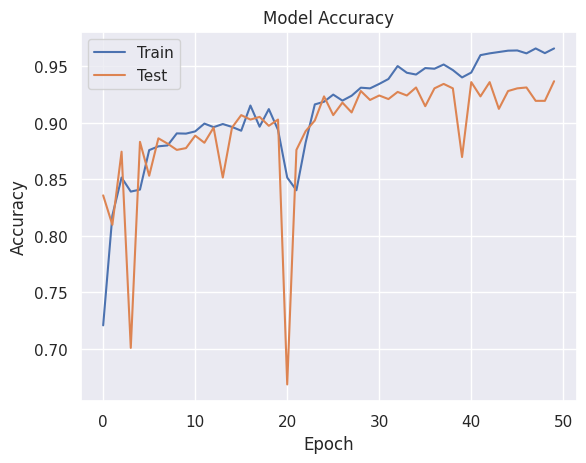

In [ ]:
# Plot the accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

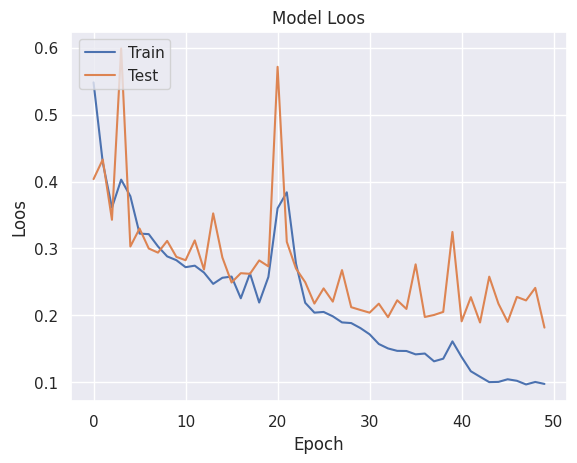

In [ ]:
# Plot the loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loos')
plt.ylabel('Loos')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
# Prediction model using data testing
prediction = model.predict(X_test, verbose=0)
y_pred = (prediction > 0.5)
print('\n', classification_report(Y_test, y_pred, digits=4))


               precision    recall  f1-score   support

           0     0.9397    0.9338    0.9367       634
           1     0.9341    0.9400    0.9370       633

    accuracy                         0.9369      1267
   macro avg     0.9369    0.9369    0.9369      1267
weighted avg     0.9369    0.9369    0.9369      1267



# **Testing With New Data**

In [ ]:
fake = """
Donald Trump Sends Out Embarrassing New Year’s Eve Message; This is Disturbing
"""

# Vectorize the tweet using the pre-fitted tokenizer instance
txt = tokenizer.texts_to_sequences([fake])

# Padding the tweet to have exactly the same shape
txt = tf.keras.preprocessing.sequence.pad_sequences(txt, maxlen=700)

# Make predictions
predictions = model.predict(txt, verbose=0)

# Get the predicted class (0 for REAL, 1 for FAKE)
predicted_class = (predictions > 0.5).astype("int32")
predicted_class_label = "FAKE" if predicted_class[0] == 1 else "REAL"

# Get the probability of the predicted class and round it to two decimal places
predicted_probability = round(predictions[0][0] * 100, 2)

# Display the results for the i-th text
print(f"Predicted Class: {predicted_class_label}, Predicted Probability: {predicted_probability} %")
print("\n")

Predicted Class: FAKE, Predicted Probability: 99.79 %




In [ ]:
fake = """
Mohamad Khweis: Another â€œVirginia Manâ€ (Palestinian-American Muslim) Charged With Terrorism
"""

#fake = """
#The Internet Brutally Mocks Disney’s New Trump Robot At Hall Of Presidents
#"""

# Vectorize the tweet using the pre-fitted tokenizer instance
txt = tokenizer.texts_to_sequences([fake])

# Padding the tweet to have exactly the same shape
txt = tf.keras.preprocessing.sequence.pad_sequences(txt, maxlen=700)

# Make predictions
predictions = model.predict(txt, verbose=0)

# Get the predicted class (0 for REAL, 1 for FAKE)
predicted_class = (predictions > 0.5).astype("int32")
predicted_class_label = "FAKE" if predicted_class[0] == 1 else "REAL"

# Get the probability of the predicted class and round it to two decimal places
predicted_probability = round(predictions[0][0] * 100, 2)

# Display the results for the i-th text
print(f"Predicted Class: {predicted_class_label}, Predicted Probability: {predicted_probability} %")
print("\n")

Predicted Class: FAKE, Predicted Probability: 99.26 %




In [ ]:
real = """
Exclusive: White House doesn't foresee shutdown, Trump wants 20 percent corporate tax
"""

# Vectorize the tweet using the pre-fitted tokenizer instance
txt = tokenizer.texts_to_sequences([real])

# Padding the tweet to have exactly the same shape
txt = tf.keras.preprocessing.sequence.pad_sequences(txt, maxlen=700)

# Make predictions
predictions = model.predict(txt, verbose=0)

# Get the predicted class (0 for REAL, 1 for FAKE)
predicted_class = (predictions > 0.5).astype("int32")
predicted_class_label = "FAKE" if predicted_class[0] == 1 else "REAL"

# Get the probability of the predicted class and round it to two decimal places
predicted_probability = round(predictions[0][0] * 100, 2)

# Display the results for the i-th text
print(f"Predicted Class: {predicted_class_label}, Predicted Probability: {predicted_probability} %")
print("\n")

Predicted Class: REAL, Predicted Probability: 0.21 %




In [ ]:
real = """
U.S. corporate alternative minimum tax should be removed: House Republican
"""

# Vectorize the tweet using the pre-fitted tokenizer instance
txt = tokenizer.texts_to_sequences([real])

# Padding the tweet to have exactly the same shape
txt = tf.keras.preprocessing.sequence.pad_sequences(txt, maxlen=700)

# Make predictions
predictions = model.predict(txt, verbose=0)

# Get the predicted class (0 for REAL, 1 for FAKE)
predicted_class = (predictions > 0.5).astype("int32")
predicted_class_label = "FAKE" if predicted_class[0] == 1 else "REAL"

# Get the probability of the predicted class and round it to two decimal places
predicted_probability = round(predictions[0][0] * 100, 2)

# Display the results for the i-th text
print(f"Predicted Class: {predicted_class_label}, Predicted Probability: {predicted_probability} %")
print("\n")

Predicted Class: REAL, Predicted Probability: 8.35 %




In [ ]:
limit = 100

# Assuming X_test is a NumPy array of indices
for i in range(len(X_test)):
    # Convert indices back to words
    current_text = ' '.join([tokenizer.index_word[idx] for idx in X_test[i] if idx != 0])

    # Vectorize the text using the pre-fitted tokenizer instance
    current_text_sequence = tokenizer.texts_to_sequences([current_text])

    # Padding the tweet to have exactly the same shape
    current_text_padded = tf.keras.preprocessing.sequence.pad_sequences(current_text_sequence, maxlen=700)

    # Make predictions
    predictions = model.predict(current_text_padded, verbose=0)

    # Get the predicted class (0 for REAL, 1 for FAKE)
    predicted_class = (predictions > 0.5).astype("int32")[0]
    predicted_class_label = "FAKE" if predicted_class == 1 else "REAL"

    # Get the probability of the predicted class and round it to two decimal places
    predicted_probability = round(predictions[0][0] * 100, 2)

    # Display the results for the i-th text
    print(f"News {i + 1} - Text: {current_text}")
    print(f"Predicted Class: {predicted_class_label}, Predicted Probability: {predicted_probability} %")
    print("\n")

    # Break the loop if the limit is reached
    if i + 1 == limit:
        break

News 1 - Text: hillary clinton absurd bernie smear why attacking right healthcare makes literally sense sanders insists would left instituting program singlepayer healthcare would progressive affordable care act yet possibility portrayed starkest terms it clinton campaign saw house burning told fire department put setting house next door fire suck oxygen feeding flames the attack predicated bill sanders introduced senate 2013 would set national singlepayer the bill would required state set singlepayer program federal board would oversee state programs take charge meet whatever requirements lays all federal programs medicare medicaid schip would folded staterun ones in way sanders bill structured little like obamacare state option setting marketplace exchange sell insurance plans federal government operating one large exchange consumers states want run since would moved even left aca obviously dead arrival congress what particularly weird clinton specific accusation sanders singlepayer 

In [ ]:
# Assuming the model and tokenizer have already been loaded and fitted

def predict_fake_news(title, text):
    # Combine 'title' and 'text' to create the input text
    input_text = f"{title} {text}"

    # Vectorize the input text using the pre-fitted tokenizer instance
    input_sequence = tokenizer.texts_to_sequences([input_text])

    # Pad the input sequence to have the same shape as the model input
    padded_input_sequence = tf.keras.preprocessing.sequence.pad_sequences(input_sequence, maxlen=700)

    # Make predictions for the current input
    predictions = model.predict(padded_input_sequence, verbose=0)

    # Get the predicted class (0 for REAL, 1 for FAKE)
    predicted_class = (predictions > 0.5).astype("int32")[0]
    predicted_class_label = "FAKE" if predicted_class == 1 else "REAL"

    # Get the probability of the predicted class and round it to two decimal places
    predicted_probability = round(predictions[0][0] * 100, 2)

    return predicted_class_label, predicted_probability

# Example usage
title = input("Please enter the news title: ")
text = input("Please enter the news text: ")
label, probability = predict_fake_news(title, text)
print(f"Label: {label}, Probability: {probability}%")

Please enter the news title: Goodbye, for Good, to Black Sabbath - The New York Times
Please enter the news text: BIRMINGHAM, England  â€”   On Saturday night at the Genting Arena here, a billowing white curtain whipped up and into the ceiling to reveal the singer Ozzy Osbourne, who, for perhaps the last time ever as the frontman of Black Sabbath, plunged into the 1970 song that gave the band its name. The track kicked off the final concert on a tour called â€œThe End,â€ which the   band has billed as its last performances. After 49 years, the group  â€”   which formed here in 1968 and has had dramatic ups and downs and a rotating roster of members  â€”   finally threw in the towel with a hometown concert. â€œLetâ€™s go crazy,â€ Mr. Osbourne yelled to the crowd, adding an expletive early in the concert, before turning in thrashing renditions of the bandâ€™s   songs, including â€œWar Pigs,â€ â€œInto the Voidâ€ and â€œIron Man,â€ and deeper cuts like the instrumental â€œRat Salad. â